# Problem Statement 
 ***X Education is an online education company that sells courses to industry professionals. They receive leads through website visits, form submissions, video views, and referrals. The current lead conversion rate is 30%, and the company wants to improve efficiency by identifying the most promising leads, referred to as 'Hot Leads,' with the goal of achieving an 80% lead conversion rate. The company seeks to implement a lead scoring model to assign scores to leads, helping the sales team focus on communicating with potential leads more effectively and increasing overall conversion rates.***




In [1]:
# Importing necessary library for Case study

# impoting for numerical and data presentation
import pandas as pd
import numpy as np

# importing for data visualization
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

# importing for Machine learning model
import sklearn
import statsmodels.api as sm

#extra import warnings 
import warnings
warnings.filterwarnings("ignore")

## Read and Basic Exploring the Data 

- Head
- Shape
- Tail
- Describe
- Info

In [2]:
# Read the data
df = pd.read_csv("leads.csv")

In [3]:
# shape and size
df.shape

(9240, 37)

In [4]:
# changing setting for better view
pd.set_option("display.max_columns",50) # set the maximum number of columns diplayed
pd.set_option("display.max_info_rows",50) # set the maximum number of info displayed

In [5]:
# top 5 rows 
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# last 5 rows
df.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [7]:
# Describe data with different percentile
df.describe(percentiles=[.25,.50,.75,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
# Categorical columns values 
for col in df.columns:
    if col not in df.describe().columns:
        print("-"*50)
        print(df[col].value_counts())

--------------------------------------------------
Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
--------------------------------------------------
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
--------------------------------------------------
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference          

--------------------------------------------------
City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64
--------------------------------------------------
Asymmetrique Activity Index
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64
--------------------------------------------------
Asymmetrique Profile Index
02.Medium    2788
01.High      2203
03.Low         31
Name: count, dtype: int64
--------------------------------------------------
I agree to pay the amount through cheque
No    9240
Name: count, dtype: int64
--------------------------------------------------
A free copy of Mastering The Interview
No     6352
Yes    2888
Name: count, dtype: int64
--------------------------------------------------
Last Notable Activity
Modifie

### Some points after basic exploration
- "Select" values presented which is basically NaN value need to change.
- "Prospects ID" is irrelevent
- "Total time spent on website" has outlier need to fix
- "Lead Score" has doulbe time "google" in it need to add both


## Data Cleaning
1. First Cleaning missing from dataset

In [10]:
# Handling "Select" which is present most of the categorical Columns
df = df.replace("Select",np.nan)

In [11]:
# Now checking missing values %age of columns
nan_count = dict(round((df.isnull().sum()/len(df))*100,2))
print(round((df.isnull().sum()/len(df))*100,2))

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [12]:
# Removing columns which has more than 40% missing values
drop_col =[col for col in nan_count if nan_count[col] > 40]
df = df.drop(columns=drop_col)

In [13]:
# Checking again 
print(round((df.isnull().sum()/len(df))*100,2))

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### Cleaning each column one by one

In [14]:
# 1."City" with almost 40% missing values
# checking Categorey in city
round(df["City"].value_counts(normalize=True)*100,2)

City
Mumbai                         57.84
Thane & Outskirts              13.50
Other Cities                   12.31
Other Cities of Maharashtra     8.20
Other Metro Cities              6.82
Tier II Cities                  1.33
Name: proportion, dtype: float64

In [15]:
# Mumbai is present most in our case so we replace missing values with mode("mumbai")
df["City"]= df["City"].replace(np.nan,"Mumbai")

In [16]:
# checking again
print(round((df.isnull().sum()/len(df))*100,2))

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [17]:
# 2. "Specialization" is second highest missing values which is around 36.5%
# checking categorey in specialization
round(df.Specialization.value_counts(normalize=True)*100,2)

Specialization
Finance Management                   16.66
Human Resource Management            14.47
Marketing Management                 14.30
Operations Management                 8.58
Business Administration               6.88
IT Projects Management                6.25
Supply Chain Management               5.96
Banking, Investment And Insurance     5.77
Travel and Tourism                    3.46
Media and Advertising                 3.46
International Business                3.04
Healthcare Management                 2.71
Hospitality Management                1.95
E-COMMERCE                            1.91
Retail Management                     1.71
Rural and Agribusiness                1.25
E-Business                            0.97
Services Excellence                   0.68
Name: proportion, dtype: float64

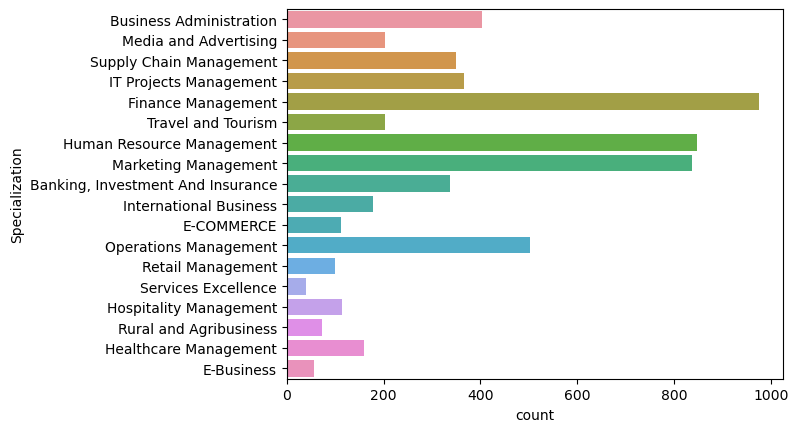

In [18]:
# visualize specialization column
sns.countplot(y=df.Specialization)
plt.show()

In [19]:
'''We can see our columns has more of finance management people but we can't we go with it because we don't have 
other categorey in our columns so we add other on place of missing values'''
# Replace NaN with others
df.Specialization = df.Specialization.replace(np.nan,"others")

In [20]:
# checking again
print(round((df.isnull().sum()/len(df))*100,2))

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [21]:
# 3."Tags" with 36% missing value
round(df.Tags.value_counts(normalize=True)*100,2) # checking categorey in Tags

Tags
Will revert after reading the email                  35.20
Ringing                                              20.43
Interested in other courses                           8.71
Already a student                                     7.90
Closed by Horizzon                                    6.08
switched off                                          4.08
Busy                                                  3.16
Lost to EINS                                          2.97
Not doing further education                           2.46
Interested  in full time MBA                          1.99
Graduation in progress                                1.89
invalid number                                        1.41
Diploma holder (Not Eligible)                         1.07
wrong number given                                    0.80
opp hangup                                            0.56
number not provided                                   0.46
in touch with EINS                                 

In [22]:
# Imputing missing values with mode 
df.Tags = df.Tags.replace(np.nan,"Will revert after reading the email")

# change values which is less than  1% to "others"
other = ["wrong number given","opp hangup","number not provided","in touch with EINS","Lost to Others","Still Thinking"
        ,"Want to take admission but has financial problems","In confusion whether part time or DLP","Interested in Next batch"
        ,"Lateral student","Shall take in the next coming month","University not recognized","Recognition issue (DEC approval)"]

df.Tags = df.Tags.replace(other,"others") # replace with others

In [23]:
# checking again
print(round((df.isnull().sum()/len(df))*100,2))

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [24]:
# 4.columns :"What matters most to you in choosing a course" 
round(df["What matters most to you in choosing a course"].value_counts(normalize=True)*100,2) # checking categorey 

What matters most to you in choosing a course
Better Career Prospects      99.95
Flexibility & Convenience     0.03
Other                         0.02
Name: proportion, dtype: float64

In [25]:
# this columns is not significant because of skewed of values
df = df.drop("What matters most to you in choosing a course",axis=1)

In [26]:
# checking again
print(round((df.isnull().sum()/len(df))*100,2))

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Country                                     26.63
Specialization                               0.00
What is your current occupation             29.11
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00


In [27]:
# 5.Columns : "What is your current occupation"
round(df["What is your current occupation"].value_counts(normalize=True)*100,2)

What is your current occupation
Unemployed              85.50
Working Professional    10.78
Student                  3.21
Other                    0.24
Housewife                0.15
Businessman              0.12
Name: proportion, dtype: float64

In [28]:
# Imputing with mode
df["What is your current occupation"] = df["What is your current occupation"].replace(np.nan,"Unemployed") # Umemployed mode here

In [29]:
# checking again
print(round((df.isnull().sum()/len(df))*100,2))

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Country                                     26.63
Specialization                               0.00
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00


In [30]:
# 6. Columns : "Country"
round(df.Country.value_counts(normalize=True)*100,2)

Country
India                   95.77
United States            1.02
United Arab Emirates     0.78
Singapore                0.35
Saudi Arabia             0.31
United Kingdom           0.22
Australia                0.19
Qatar                    0.15
Hong Kong                0.10
Bahrain                  0.10
Oman                     0.09
France                   0.09
unknown                  0.07
South Africa             0.06
Nigeria                  0.06
Germany                  0.06
Kuwait                   0.06
Canada                   0.06
Sweden                   0.04
China                    0.03
Asia/Pacific Region      0.03
Uganda                   0.03
Bangladesh               0.03
Italy                    0.03
Belgium                  0.03
Netherlands              0.03
Ghana                    0.03
Philippines              0.03
Russia                   0.01
Switzerland              0.01
Vietnam                  0.01
Denmark                  0.01
Tanzania                 0.01
Li

In [31]:
# Imputing with India
df["Country"] = df.Country.replace(np.nan,"India")

In [32]:
# checking again
print(round((df.isnull().sum()/len(df))*100,2))

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Country                                     0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendati

In [33]:
# "TotalVisits"=1.5% , "Page Views Per Visit "=1.5% and "Last Activity"=1% have missing values 
# Removing rows which has missing values
df = df.dropna()

In [34]:
# checking again
print(round((df.isnull().sum()/len(df))*100,2))

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

2. Cleaning Other inappropiate data 

In [35]:
# Droping "Lead Number" it is irrelevent
df = df.drop(["Lead Number"],axis=1)

In [36]:
# "Lead Source" has two google in it
df["Lead Source"].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [37]:
# Fixing two "google" 
df["Lead Source"] = df["Lead Source"].replace("google","Google")

In [38]:
df["Lead Source"].value_counts() # checking

Lead Source
Google               2873
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

In [39]:
# Moving values less than 10 to "others"
others_lead_source = ["bing","Click2call","Social Media","Live Chat","Press_Release","Pay per Click Ads"
                     ,"blog","WeLearn","welearnblog_Home","youtubechannel","testone","NC_EDM"]

df["Lead Source"] = df["Lead Source"].replace(others_lead_source,"Others")

In [40]:
# Checking final shape
df.shape

(9074, 28)

## EDA/Visualization
1. Univariate 
2. Bivariate
3. Multivariate (optional)

In [41]:
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,others,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,others,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,others,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [42]:
# First Creating continues and Categorical Cols list
cat_cols = list(df.select_dtypes(include="object").columns) # Category list


cont_cols = [ col for col in df.columns if col not in cat_cols] # Continues list
target = df["Converted"] 

cat_cols.remove("Prospect ID")  # remove prospect id

print(f"Total Columns: {len(df.columns)}\n" 
      f"Total Category Columns: {len(cat_cols)}\n"
     f"Total Continues Columns: {len(cont_cols)}")

Total Columns: 28
Total Category Columns: 23
Total Continues Columns: 4


Lead Origin


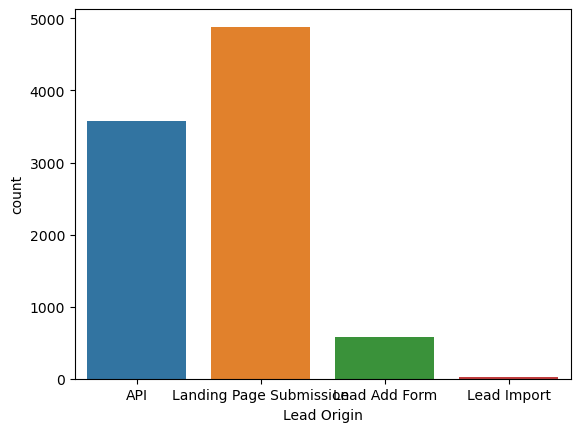

Lead Source


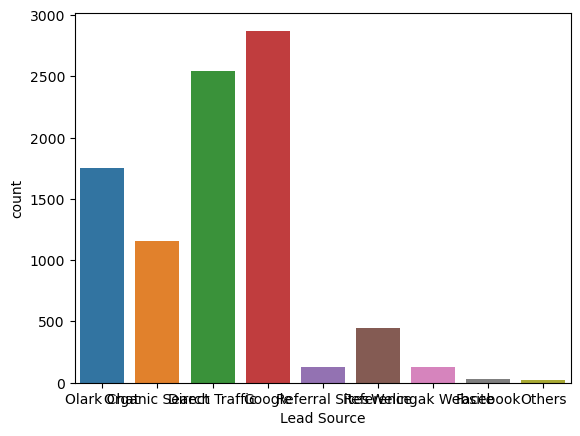

Do Not Email


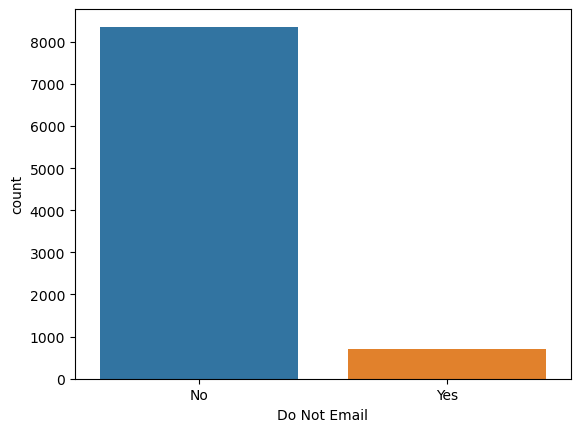

Do Not Call


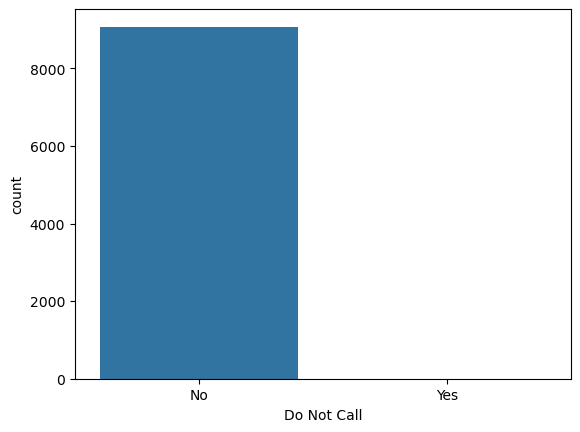

Last Activity


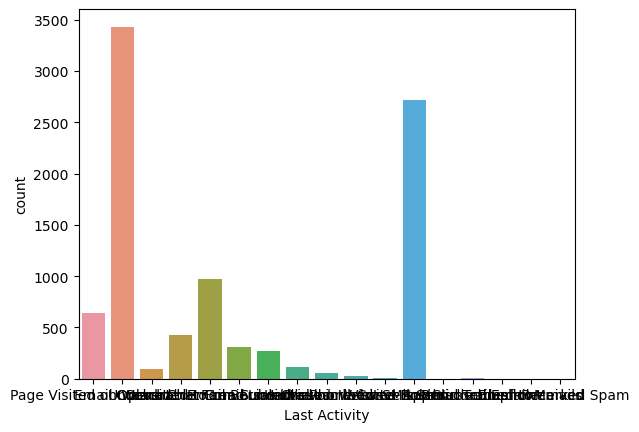

Country


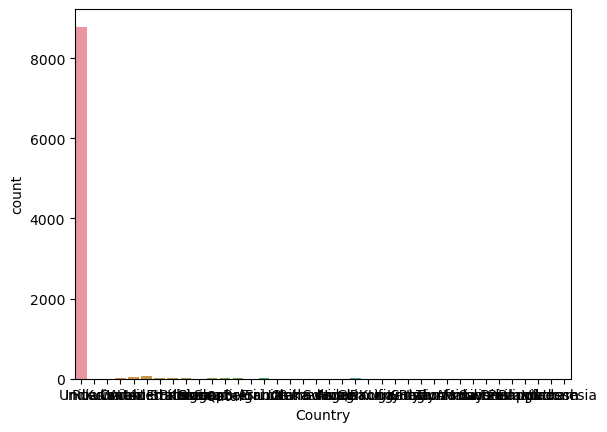

Specialization


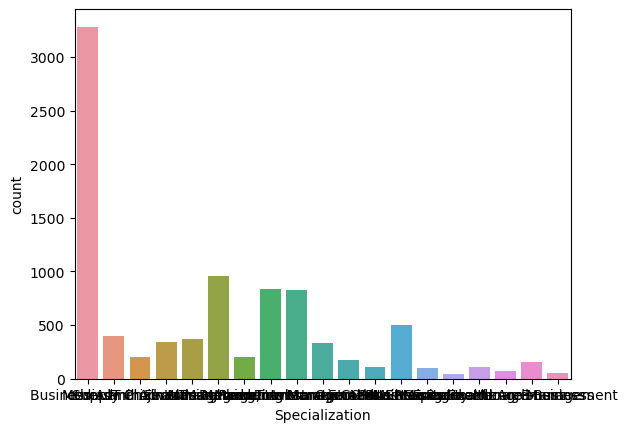

What is your current occupation


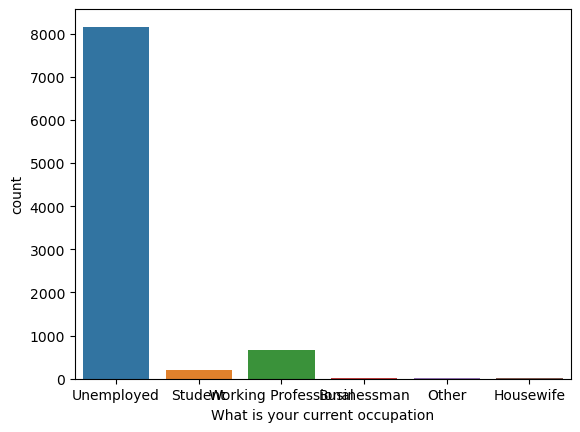

Search


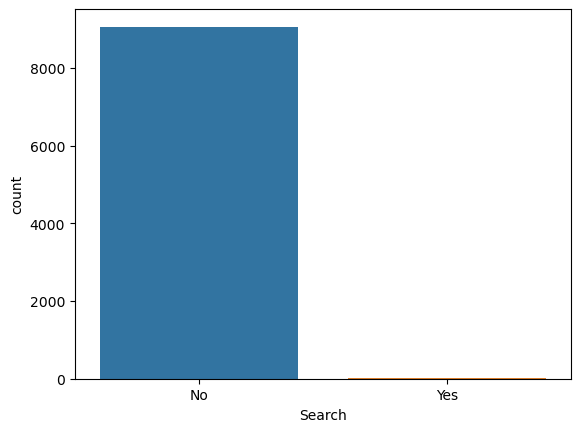

Magazine


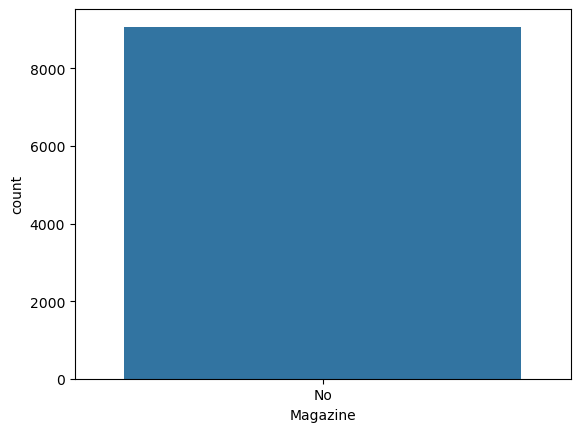

Newspaper Article


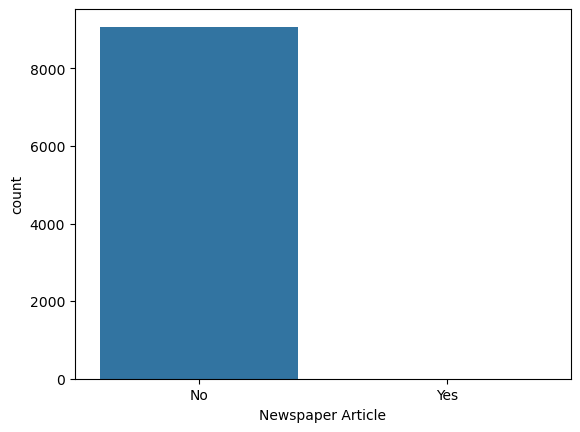

X Education Forums


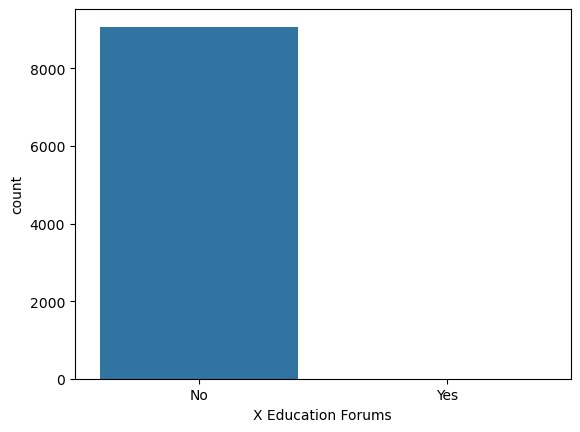

Newspaper


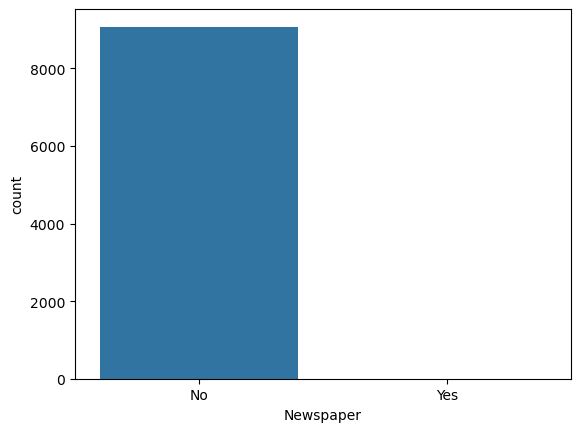

Digital Advertisement


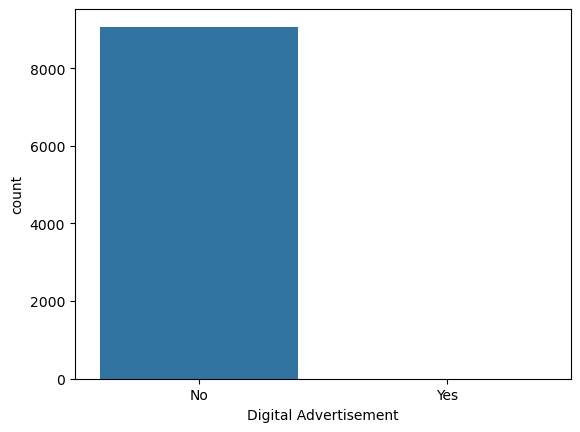

Through Recommendations


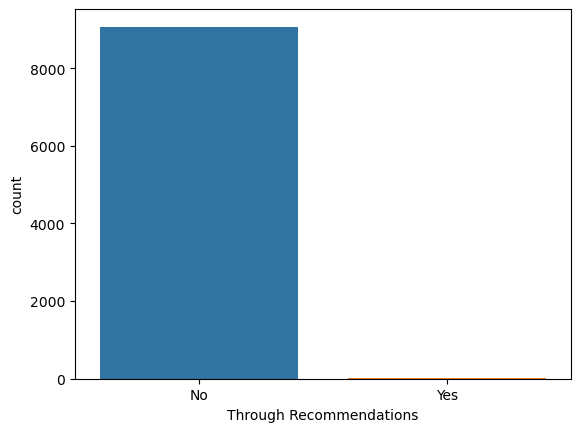

Receive More Updates About Our Courses


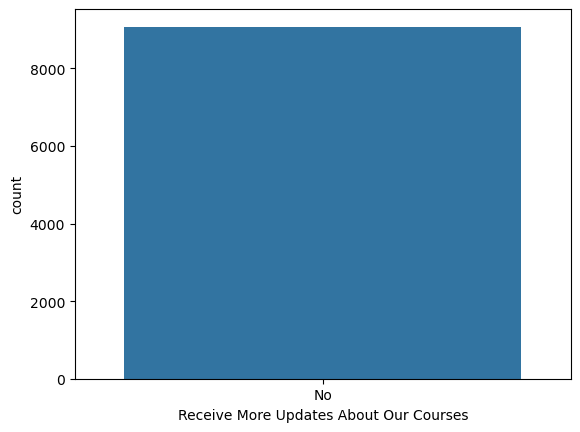

Tags


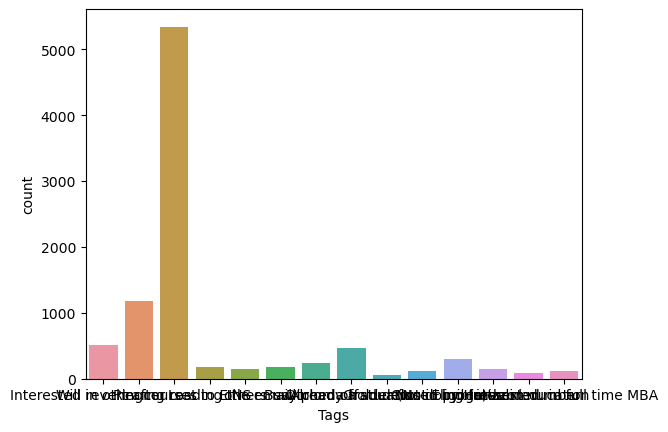

Update me on Supply Chain Content


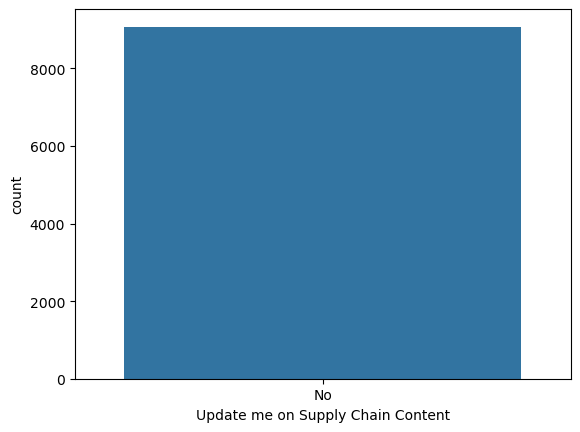

Get updates on DM Content


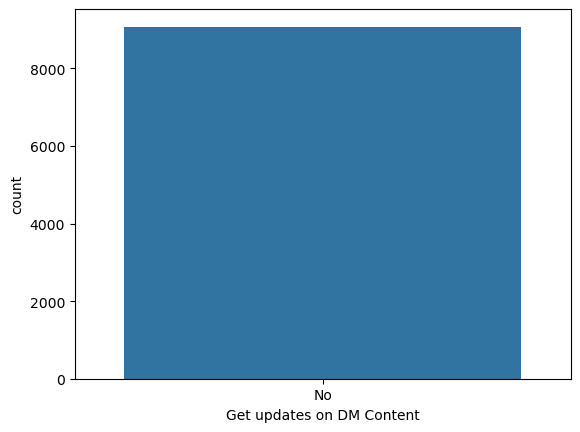

City


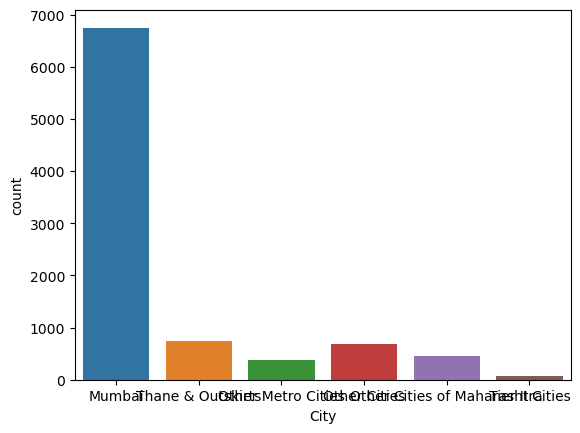

I agree to pay the amount through cheque


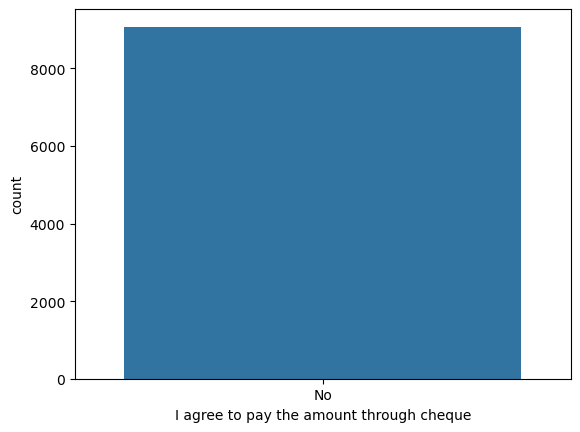

A free copy of Mastering The Interview


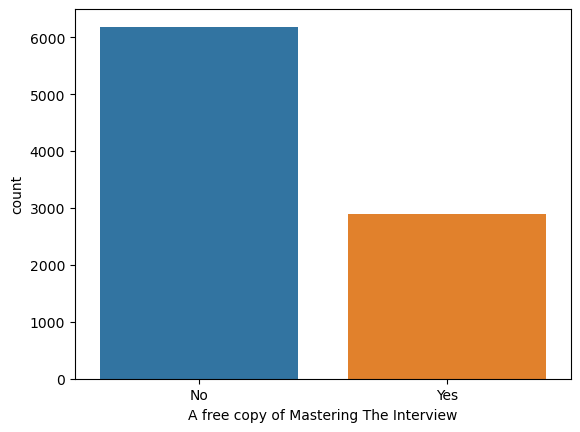

Last Notable Activity


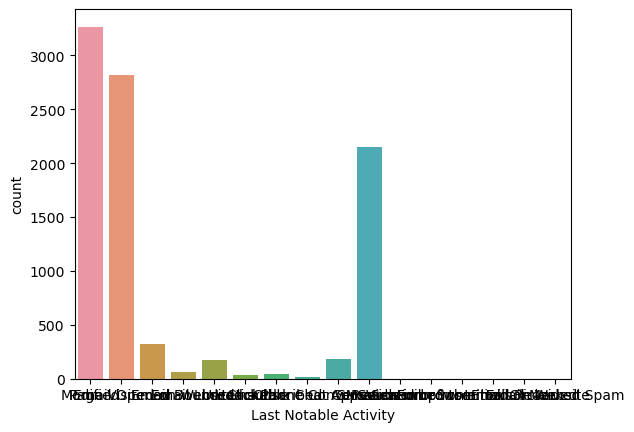

In [43]:
# vilualizing category columns 
for i in cat_cols:
    print(i)
    sns.countplot(x=df[i])
    plt.show()

In [44]:
# Columns which don't have much relevent 
irre_cols = ["Do Not Call","Search","Magazine","Newspaper Article","X Education Forums","Newspaper",
             "Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses",
             "Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"
             ,"Tags","A free copy of Mastering The Interview"]
df = df.drop(irre_cols,axis=1)

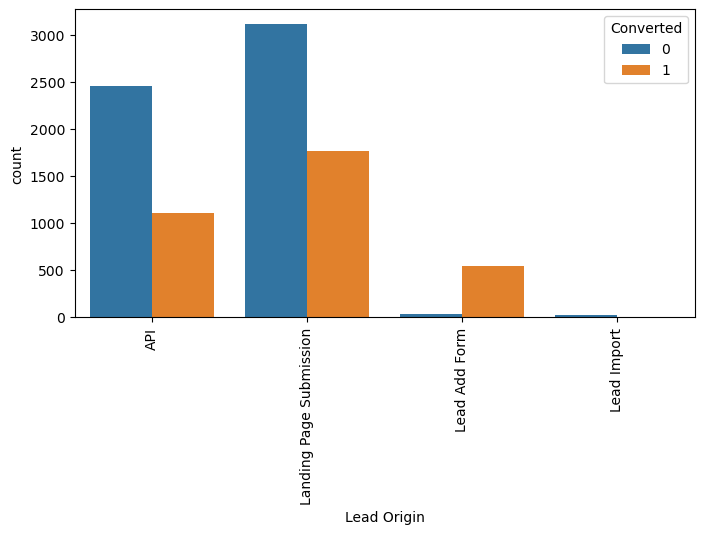

In [45]:
plt.figure(figsize=(8,4))
sns.countplot(x=df["Lead Origin"],hue=target)
plt.xticks(rotation=90)
plt.show()

***Insight***
- API and Landing page Submission has more lead origin we can focus on these two.
- Lead Add Form has less lead but converting chance are higher than other 


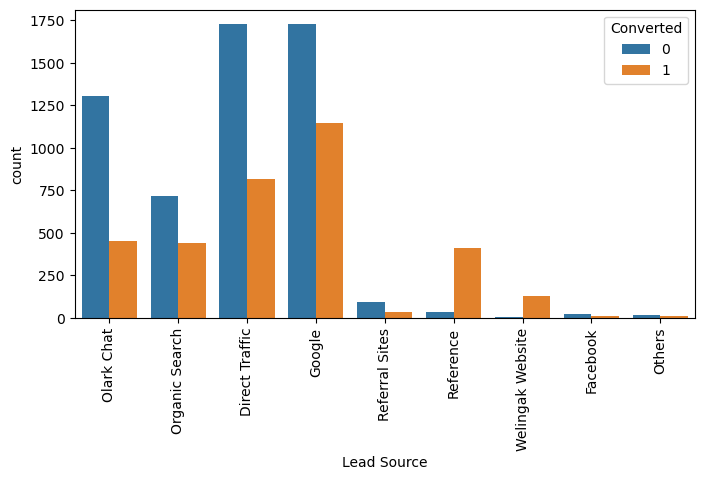

In [46]:
plt.figure(figsize=(8,4))
sns.countplot(x=df["Lead Source"],hue=target)
plt.xticks(rotation=90)
plt.show()

***Insight***
- Google and Direct created highest lead 
- we can se "Reference" and "Welingak Website" has less led but conversion is high

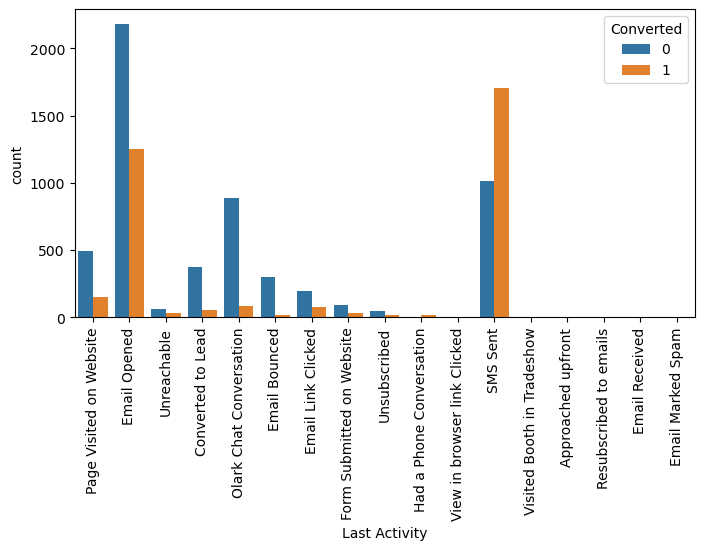

In [47]:
plt.figure(figsize=(8,4))
sns.countplot(x=df["Last Activity"],hue=target)
plt.xticks(rotation=90)
plt.show()

In [48]:
# column:"last Activity" 
df["Last Activity"].value_counts(normalize=True)*100

Last Activity
Email Opened                    37.822350
SMS Sent                        29.931673
Olark Chat Conversation         10.711924
Page Visited on Website          7.053119
Converted to Lead                4.716773
Email Bounced                    3.438395
Email Link Clicked               2.942473
Form Submitted on Website        1.278378
Unreachable                      0.991845
Unsubscribed                     0.650209
Had a Phone Conversation         0.275512
View in browser link Clicked     0.066123
Approached upfront               0.055102
Email Received                   0.022041
Email Marked Spam                0.022041
Visited Booth in Tradeshow       0.011020
Resubscribed to emails           0.011020
Name: proportion, dtype: float64

In [49]:
# Creating Other head in column:"Last Activity" which is less than 1%
activity_others = ["Unreachable","Unsubscribed","Had a Phone Conversation","View in browser link Clicked",
                   "Approached upfront","Email Received","Email Marked Spam","Visited Booth in Tradeshow",
                   "Resubscribed to emails"]
df["Last Activity"] = df["Last Activity"].replace(activity_others,"Others_activity")

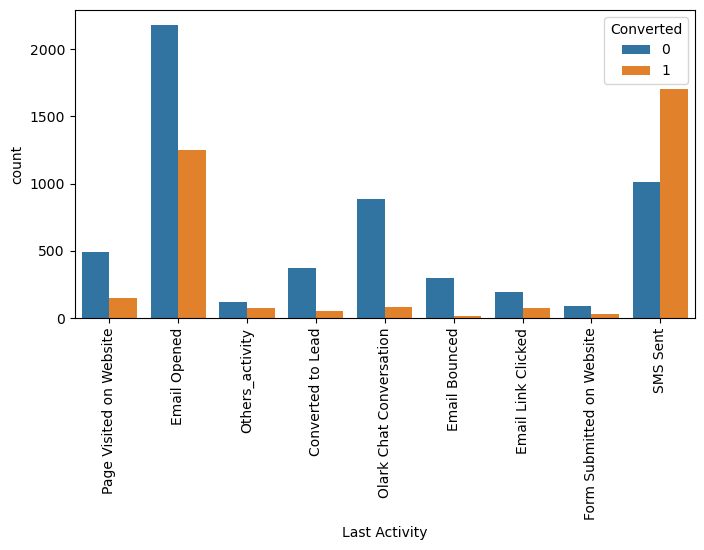

In [50]:
plt.figure(figsize=(8,4))
sns.countplot(x=df["Last Activity"],hue=target)
plt.xticks(rotation=90)
plt.show()

***Insight***
- SMS has highest coversion rate it more than half of its lead.
- Email Opened is the highest lead generator here.

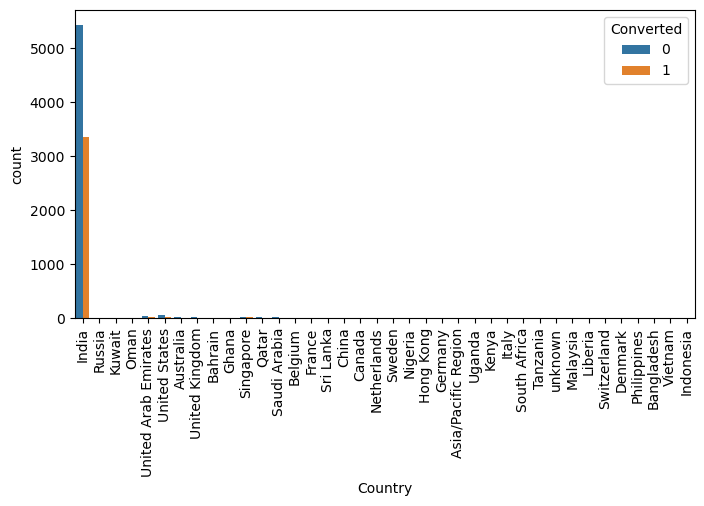

In [51]:
plt.figure(figsize=(8,4))
sns.countplot(x=df["Country"],hue=target)
plt.xticks(rotation=90)
plt.show()

***Insight***
- Country column has not good insight.
- India is most lead generator and converted.

In [52]:
# Droping country column
df = df.drop("Country",axis=1)

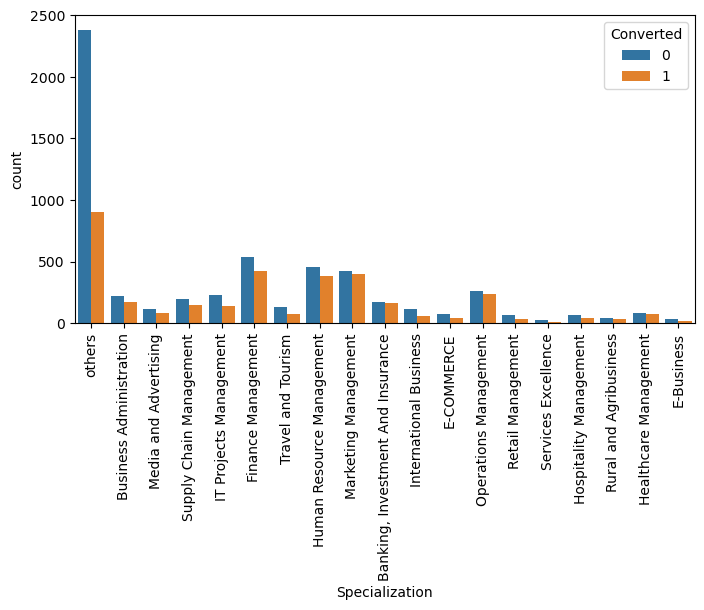

In [53]:
plt.figure(figsize=(8,4))
sns.countplot(x=df["Specialization"],hue=target)
plt.xticks(rotation=90)
plt.show()

***Insight***
- Most of specialization has almost half of conversion rate we should focus on them.

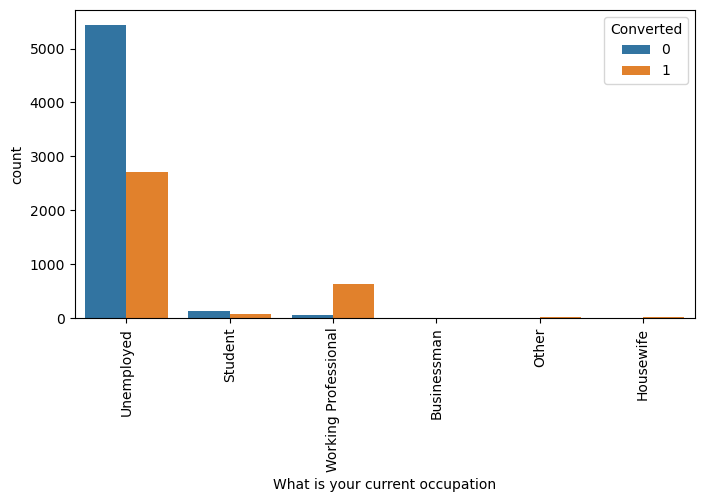

In [54]:
plt.figure(figsize=(8,4))
sns.countplot(x=df["What is your current occupation"],hue=target)
plt.xticks(rotation=90)
plt.show()

***Insight***
- Working Professional are best to focus it has more than 80% of converted.
- Student has also good converted here need to be focused.
- Unemployed has generated good amount of lead and conversion rate is more than 25%.

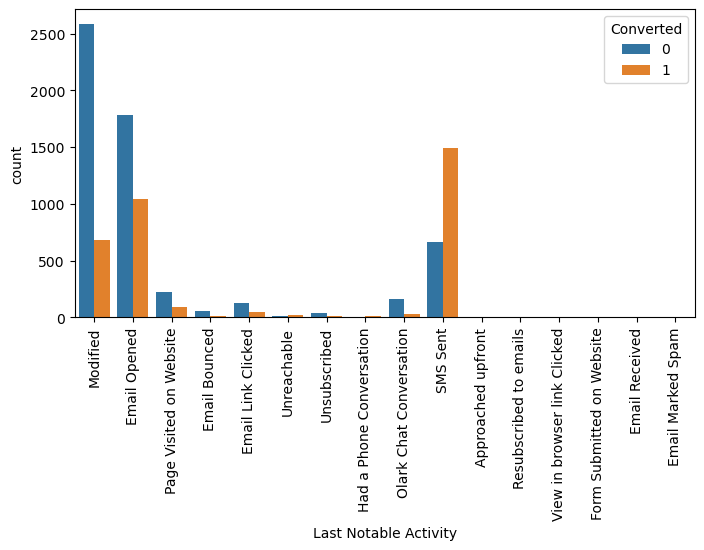

In [55]:
plt.figure(figsize=(8,4))
sns.countplot(x=df["Last Notable Activity"],hue=target)
plt.xticks(rotation=90)
plt.show()

***Insight***
- No Use full insight coming these insight we have already seen in Last Activity
- Its has most of common category matching with "Last Activity". 
- we can create Modified dummy one for feature it might be use full

In [56]:
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,others,Unemployed,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,Email Opened,others,Unemployed,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others_activity,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,others,Unemployed,Mumbai,Modified


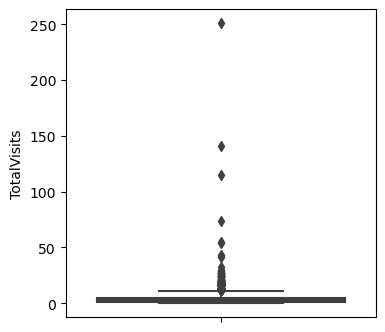

In [57]:
# Visualize Category varibale 
plt.figure(figsize=(4,4))
sns.boxplot(y=df.TotalVisits)
plt.show()

In [58]:
df.TotalVisits.describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [59]:
# shape before
df.shape

(9074, 13)

In [60]:
# Totol visits has outliers Treating with quantiles
per_visit = list(df.TotalVisits.quantile([0,.975]).values)

df=df[df["TotalVisits"]<=per_visit[1]] # filtering with 99 percentile

df.shape # shape after


(8852, 13)

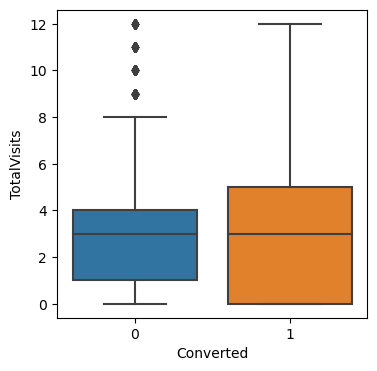

In [61]:
plt.figure(figsize=(4,4))
sns.boxplot(y=df.TotalVisits,x=target)
plt.show()

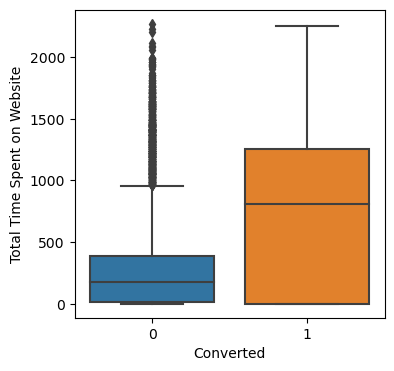

In [62]:
plt.figure(figsize=(4,4))
sns.boxplot(y=df["Total Time Spent on Website"],x=target)
plt.show()

In [63]:
df["Total Time Spent on Website"].describe()

count    8852.000000
mean      477.102915
std       543.479421
min         0.000000
25%         5.000000
50%       240.000000
75%       906.250000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

More the person spend Total time spent on website higher the chance to get converted

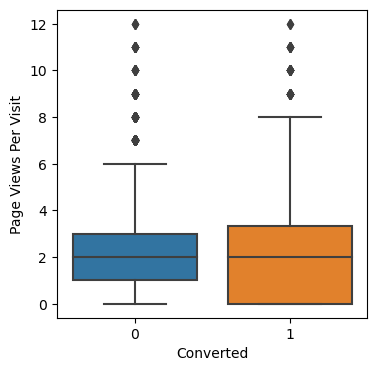

In [64]:
plt.figure(figsize=(4,4))
sns.boxplot(y=df["Page Views Per Visit"],x=target)
plt.show()

<Axes: >

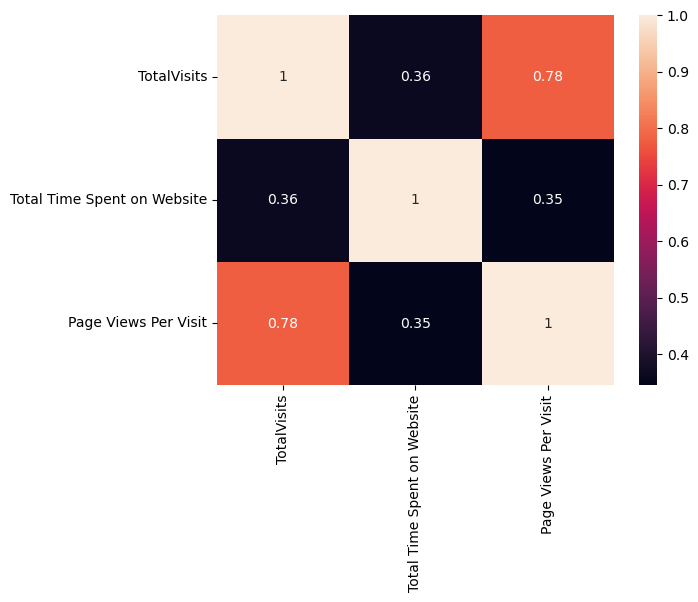

In [65]:
cont_cols.remove("Converted")
sns.heatmap(df[cont_cols].corr(),annot=True)

***Insight***
- "Page Views Per Visit" and "Total Visits" are highly correlated 
- We can remove while doing Model Building

## Data Preprocessing

In [66]:
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,others,Unemployed,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,Email Opened,others,Unemployed,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others_activity,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,others,Unemployed,Mumbai,Modified


In [67]:
# converting binnary variable to 0 and 1
df["Do Not Email"]=df["Do Not Email"].apply(lambda x : 1 if x=="Yes" else 0, )

In [68]:
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,others,Unemployed,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,others,Unemployed,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others_activity,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,others,Unemployed,Mumbai,Modified


### Dummy Creation

In [69]:
# creating Dummy varibale for category columns

cat_cols = list(df.select_dtypes(include="object").columns) # Cat columns list
cat_cols.remove("Last Notable Activity") # Removing "last Notable Activity"
cat_cols.remove("Prospect ID") # Removing "Prospect ID"

dummies_col = pd.get_dummies(df[cat_cols], drop_first=True,dtype=int) # droping first value
dummies_col.head() 


,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others_activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [70]:
# creating single dummy for "Last Notable Activity"["Modified"]
last_notable_cols = pd.get_dummies(df["Last Notable Activity"],dtype=int)

dummies_col["Last Notable Activity Modified"] = last_notable_cols["Modified"] # adding modified to dummies
dummies_col.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others_activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity Modified
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [71]:
#shape before
print(f"Last Dataset shape: {df.shape}\n"
      f"Dummies Dataset shape:{dummies_col.shape}")

Last Dataset shape: (8852, 13)
Dummies Dataset shape:(8852, 48)


In [72]:
# Concat dummies and last data set 
df = pd.concat([df,dummies_col],axis=1)

cat_cols.append("Last Notable Activity")
df = df.drop(cat_cols,axis=1) # drop category columns

#shape After
print(f"final Dataset shape: {df.shape}")

final Dataset shape: (8852, 54)


In [ ]:
# importing train test split
from sklearn.model_selection import train_test_split

X = df.drop(["Converted"],axis=1) # Features Variable
y = df[["Converted"]] # Target variable

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100,test_size=0.3)

### Scaling 

In [ ]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# scaling continues columns
X_train[cont_cols] =scaler.fit_transform(X_train[cont_cols]) # fit_tranform on X_train
X_test[cont_cols] = scaler.transform(X_test[cont_cols]) # transform on X_test


In [ ]:
X_train_sc = X_train.drop(["Prospect ID"],axis=1) # Droping Propect ID
X_test_sc = X_test.drop(["Prospect ID"],axis=1) 

In [ ]:
# shapes
print(f"X_train shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

### Feature Selection

In [ ]:
# Feature selecting using RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression()
selector = RFE(estimator,n_features_to_select=15)
selector.fit(X_train_sc,y_train)
selector.support_

In [ ]:
# collecting top 15 feature
features = list(X_train_sc.columns[selector.support_])
features

## Model Building

In [ ]:
# Creating first Model 
X_train_sm = sm.add_constant(X_train_sc[features])
model1 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result1 = model1.fit()
result1.summary()

In [ ]:
# columns "What is your current occupation_Housewife" has high p-Value
features.remove("What is your current occupation_Housewife")

In [ ]:
# second model
X_train_sm = sm.add_constant(X_train_sc[features])

model2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())

result2 = model2.fit()

result2.summary()

- P-values are less than 1% here. Now we can check VIF

In [ ]:
# importing VIF for checking covariance
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

- P-values for all features are lower than 1% and VIF for all features is lower than 5 which is good sign to proceed furhter

In [ ]:
# Making prediction on train set 
y_train_pred = result2.predict(X_train_sm) 
y_train_pred[:10]

In [ ]:
# creating DataFrame for actual and prediction
y_train_pred_final = X_train[["Prospect ID"]] # Prospect IDs'
y_train_pred_final["Actual Converted"] = y_train # Converted
y_train_pred_final["Converted pred"] = y_train_pred
y_train_pred_final.head()

 **Chosing arbitrary cut-off is 0.5**

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final["Converted pred"].map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

In [ ]:
# Importing metrics
from sklearn import metrics

# Creating confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final["Actual Converted"], y_train_pred_final.predicted)

confusion = pd.DataFrame(data=confusion, columns=["predict_false","predict_true"],index=["actual_false","actual_true"])
print("Confusion Matrix\n","*"*50)
print(confusion)

In [ ]:
TP = confusion.iloc[1,1]
FN= confusion.iloc[1,0]
TN= confusion.iloc[0,0]
FP= confusion.iloc[0,1]

In [ ]:
print(f"Sensitivity: {round(TP/float(TP+FN),2)}") # correct positive prediction / total actual positive
print("-"*50)
print(f"Specificity: {round(TN/float(TN+FP),2)}") # correct  Negative prediction / total actual Negative 
print("-"*50)
print(f"Acuracy: {round(float(TP+TN)/float(TP+FN+FP+TN),2)}") # total correct prediction / total values 
print("-"*50)
print(f"Precision: {round(TP/float(TP+FP),2)}") # correct positive prediction / total prediction positive
print("-"*50)
print(f"Negative prediction Rate: {round(TP/float(TP+FN),2)}") # correct Negative prediction / total prediction Negative
print("-"*50)
print(f"False Positive Rate: {round(FP/float(TN+FP),2)}") # wrong positive predictiom / total actual Negatice 


***Our Acuracy is 81% but Sensitivity is 70% which is not around specificity which is 89% need to be optimised by ROC curve.***

In [ ]:

from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_scores, plot_cutoff=True):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(4, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    if plot_cutoff:
        optimal_idx = np.argmax(tpr - fpr)
        optimal_threshold = thresholds[optimal_idx]
        plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label=f'Optimal Cutoff ({optimal_threshold:.2f})')
        plt.legend(loc="lower right")

    plt.show()

    return optimal_threshold

# Example usage:
# Replace y_true and y_scores with your actual labels and predicted probabilities
optimal_threshold = plot_roc_curve(y_train_pred_final["Actual Converted"], y_train_pred_final["Converted pred"])



In [ ]:
# Creating columns with different probability cut-off values
num = [float(x)/10 for x in range(11)]
for i in num:
    y_train_pred_final[f'{i}'] = y_train_pred_final["Converted pred"].map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

In [ ]:
# Creating cut-off dataframe 
cut_off = pd.DataFrame(columns=["prob","accur","sensi","speci"])

for i in num:
    con = metrics.confusion_matrix(y_train_pred_final["Actual Converted"],y_train_pred_final[f"{i}"])
    accuracy = metrics.accuracy_score(y_train_pred_final["Actual Converted"],y_train_pred_final[f"{i}"])
    sensitivity = metrics.recall_score(y_train_pred_final["Actual Converted"],y_train_pred_final[f"{i}"])
    specificity = con[0,0]/(con[0,1]+con[0,0])
    cut_off.loc[i] = [i,accuracy,sensitivity,specificity]
cut_off

In [ ]:
#plot line graph of metrics
cut_off.plot.line(x="prob",y=["speci","sensi","accur"])

***We have seen 0.33 is the optimal cut-off probability so can go with it.***

In [ ]:
# Making final prediction 
y_train_pred_final["final_pred"] = y_train_pred_final["Converted pred"].map(lambda x: 1 if x > 0.33 else 0 )

# let's see head now
y_train_pred_final.head()

## Model Evaluation

In [ ]:
# let's calculate metrics now

# Creating confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final["Actual Converted"], y_train_pred_final.final_pred)

confusion = pd.DataFrame(data=confusion, columns=["predict_false","predict_true"],index=["actual_false","actual_true"])
print("Confusion Matrix\n","*"*50)
print(confusion,"\n\n\n")

TP = confusion.iloc[1,1]
FN= confusion.iloc[1,0]
TN= confusion.iloc[0,0]
FP= confusion.iloc[0,1]

print(f"Sensitivity: {round(TP/float(TP+FN),2)}") # correct positive prediction / total actual positive
print("-"*50)
print(f"Specificity: {round(TN/float(TN+FP),2)}") # correct  Negative prediction / total actual Negative 
print("-"*50)
print(f"Acuracy: {round(float(TP+TN)/float(TP+FN+FP+TN),2)}") # total correct prediction / total values 
print("-"*50)
print(f"Precision: {round(TP/float(TP+FP),2)}") # correct positive prediction / total prediction positive
print("-"*50)
print(f"Negative prediction Rate: {round(TP/float(TP+FN),2)}") # correct Negative prediction / total prediction Negative
print("-"*50)
print(f"False Positive Rate: {round(FP/float(TN+FP),2)}") # wrong positive predictiom / total actual Negatice 

- Now let's Make prediction on testset

In [ ]:
# let's see head first
X_test_sc.head()

In [ ]:
# adding constant to X_test
X_test_sm = sm.add_constant(X_test_sc[features])

In [ ]:
# Making prediction on testset
y_test_pred = result2.predict(X_test_sm)

In [ ]:
# creating DataFrame for X_test actual and prediction
y_test_pred_final = X_test[["Prospect ID"]] # Prospect IDs'
y_test_pred_final["actual_converted"] = y_test # Converted
y_test_pred_final["converted_pred"] = y_test_pred
y_test_pred_final.head()

In [ ]:
# Converting prediction 
y_test_pred_final["final_pred"] = y_test_pred_final["converted_pred"].map(lambda x: 1 if x > 0.33 else 0 )

y_test_pred_final.head()

In [ ]:
# let's calculate metrics now

# Creating confusion metrics
confusion = metrics.confusion_matrix(y_test_pred_final["actual_converted"], y_test_pred_final.final_pred)

confusion = pd.DataFrame(data=confusion, columns=["predict_false","predict_true"],index=["actual_false","actual_true"])
print("Confusion Matrix\n","*"*50)
print(confusion,"\n\n\n")

TP = confusion.iloc[1,1]
FN= confusion.iloc[1,0]
TN= confusion.iloc[0,0]
FP= confusion.iloc[0,1]

print(f"Sensitivity: {round(TP/float(TP+FN),2)}") # correct positive prediction / total actual positive
print("-"*50)
print(f"Specificity: {round(TN/float(TN+FP),2)}") # correct  Negative prediction / total actual Negative 
print("-"*50)
print(f"Acuracy: {round(float(TP+TN)/float(TP+FN+FP+TN),2)}") # total correct prediction / total values 
print("-"*50)
print(f"Precision: {round(TP/float(TP+FP),2)}") # correct positive prediction / total prediction positive
print("-"*50)
print(f"Negative prediction Rate: {round(TP/float(TP+FN),2)}") # correct Negative prediction / total prediction Negative
print("-"*50)
print(f"False Positive Rate: {round(FP/float(TN+FP),2)}") # wrong positive predictiom / total actual Negatice 

#### Conclusion
We have seen our result on both train and test data we got 
Train Result
1. Accuracy : 81%
2. Sensitivity : 82%
3. Specificity : 80%

Test Result
1. Accuracy : 81%
2. Sensitivity : 81%
3. Specificity : 82%

since our model is good accuracy of 81% we are good to go with this model this will give us conversion rate of 81% and We should be able to able to give to the CEO with confidence in making of convertion rate of 81%.

In [ ]:
''' The customers which should be contacted are the customers whose "Lead Score" 
is equal to or greater than 85. They can be termed as 'Hot Leads'''
y_test_pred_final['Lead_Score'] = y_test_pred_final.converted_pred.map( lambda x: round(x*100))


hot_leads=y_test_pred_final.loc[y_test_pred_final["Lead_Score"]>=85]
hot_leads.shape

In [ ]:
# final features
result2.params.sort_values()

- we can see in our features some have positive relation with convertion rate and some have negative.
- We can make more call on features which are positive and do not make much call to those features which are negative.
- If we make to those customers whose positive features are increasing than there is higher chance of conversion. 
- If we make more call to person whose negative features are increasing than there is less change of convertion.